<a href="https://colab.research.google.com/github/Foco22/Machine-Learning-and-Big-Data-UC/blob/master/Python%20para%20ML/Miniproyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Instrucciones Miniproyecto 2**


# Primera parte :**Solución cerrada de regresión lineal**



In [ ]:
np.random.seed(4)

X = 3*np.random.rand(100,1) #Varaible Dependiente

Y = 5 + 2*X - 2.5*np.random.rand(100,1) #Variable Independiente

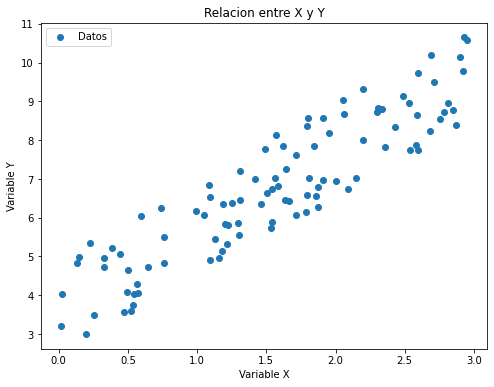

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y,label = 'Datos')
plt.title('Relacion entre X y Y')
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.legend()

In [ ]:
X_ = np.c_[np.ones((100,1)), X]
theta_opt = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(Y)
theta_opt 

array([[3.65234872],
       [2.0015891 ]])

In [ ]:
#Error cuadratico medio
Y_pred_cuadrado = theta_opt[0] + X*theta_opt[1]
RSME = np.sqrt(np.sum((Y_pred_cuadrado - Y)**2)/len(Y))

print('El error cuadratico medio es: {}'.format(RSME))

El error cuadratico medio es: 0.7609015084090673


In [ ]:
X_nuevo = np.array([[0], [3]])
X_nuevo_ = np.c_[np.ones((2,1)), X_nuevo]
y_pred = X_nuevo_.dot(theta_opt)

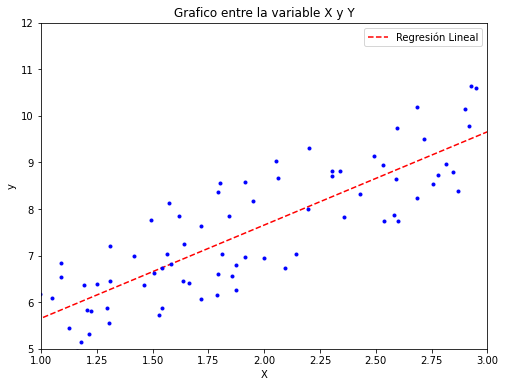

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(X_nuevo, y_pred, 'r--')
plt.plot(X,Y, "b.")
plt.ylabel('y')
plt.xlabel('X')
plt.axis([1, 3, 5, 12])
plt.legend(["Regresión Lineal"])
plt.title('Grafico entre la variable X y Y')
plt.show()

**Regresión Polinomial**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ts.csv to ts.csv


In [ ]:
import io
np.random.seed(4)

df = pd.read_csv(io.BytesIO(uploaded['ts.csv']))
df = df.sample(200)
df.head()

,tiempo,magnitud
123,-1.134305,-1.080341
550,-0.340855,-0.374717
496,-0.404956,-0.995046
515,-0.378688,-0.192496
474,-0.447585,-0.211881


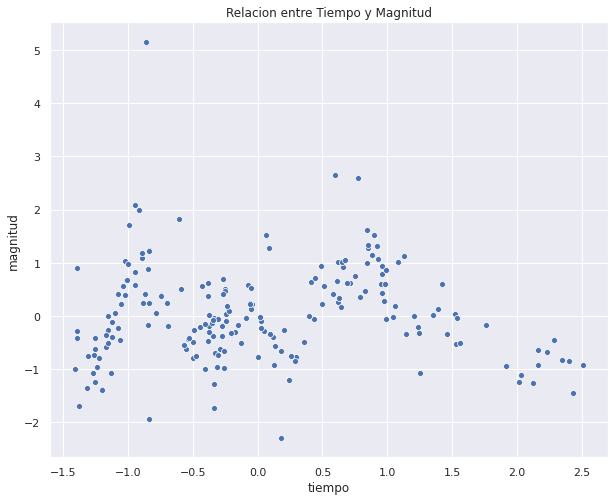

In [ ]:
sns.set()
plt.figure(figsize=(10,8))
plt.title('Relacion entre Tiempo y Magnitud')
sns.scatterplot(x="tiempo", y="magnitud", data=df)

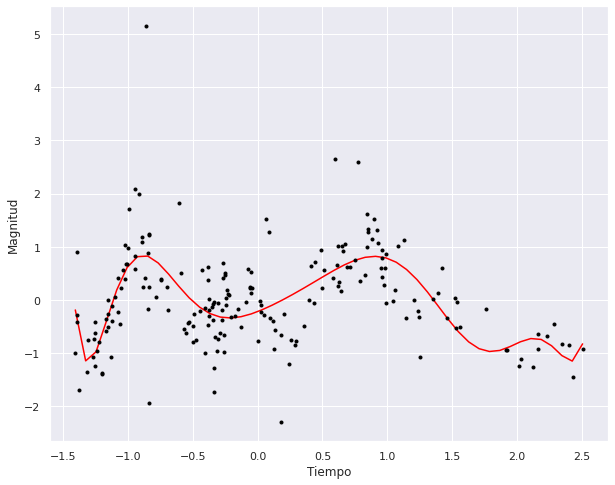

In [ ]:
polinomio = PolynomialFeatures(degree = 10) 
model = LinearRegression()

x = df['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 
model.fit(data_poly, df['magnitud']) 

x_lin = np.linspace(min(df['tiempo']),max(df['tiempo'])).reshape(-1,1)

data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

plt.figure(figsize=(10,8))
plt.plot(x_lin,y_pred, color='red')
plt.plot(df['tiempo'], df['magnitud'],'.', color='black')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.show()

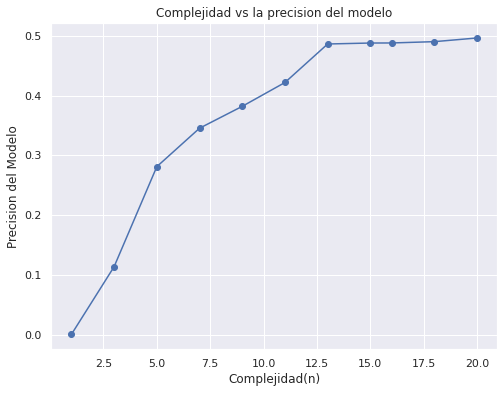

In [ ]:
def sensibilidad_resultados():
    from sklearn.linear_model import Ridge
    grados = [1,3,5,7,9,11,13,15,16,18,20]
    score_lista = []
    for i in grados:
        polinomio = PolynomialFeatures(degree = i) 
        
        model = LinearRegression()
        x = df['tiempo'].values.reshape(-1,1)
        data_poly = polinomio.fit_transform(x) 
        model.fit(data_poly, df['magnitud']) 
        score = model.score(data_poly, df['magnitud'])
        score_lista.append(score)
    
    
    plt.figure(figsize=(8,6))
    plt.ylabel('Precision del Modelo')
    plt.xlabel('Complejidad(n)')
    plt.title('Complejidad vs la precision del modelo')
    plt.plot(grados, score_lista, 'o-')
    plt.show()
    
sensibilidad_resultados()

 *¿Qué observa a medida que aumenta el
grado del polinomio?*

Se puede observar que a medida que se aumenta la complejidad del modelo (n), aumenta la precisión del mismo. Esto se debe a que el modelo capta de mejor manera las tendencias particulares de los datos. 
De igual manera, se debe tener bastante precaución con este punto, ya que a medida que se aumenta la complejidad, el modelo es mas overfitting, lo que genera que significa que no puede generalizar bien las tendencias de los datos.  (se esta aprendiendo los datos de memoria, pero el modelo no será bueno cuando le entregamos otros datos.).


**Regresión con Penalización**


In [ ]:
def Ridge(grado,alpha):

    from sklearn.linear_model import Ridge
    polinomio = PolynomialFeatures(degree = grado) 
    x = df['tiempo'].values.reshape(-1,1)
    data_poly = polinomio.fit_transform(x)
    ridgereg = Ridge(alpha=alpha, normalize=True)
    ridgereg.fit(data_poly,df['magnitud'])
    return ridgereg.score(data_poly,df['magnitud'])

In [ ]:
def lasso(grado, alpha):

    from sklearn.linear_model import Lasso   
    polinomio = PolynomialFeatures(degree = grado)   
    x = df['tiempo'].values.reshape(-1,1)  
    data_poly = polinomio.fit_transform(x)   
    lassoreg = Lasso(alpha=alpha,normalize=True)  
    lassoreg.fit(data_poly,df['magnitud']) 
    
    return lassoreg.score(data_poly,df['magnitud'])

    

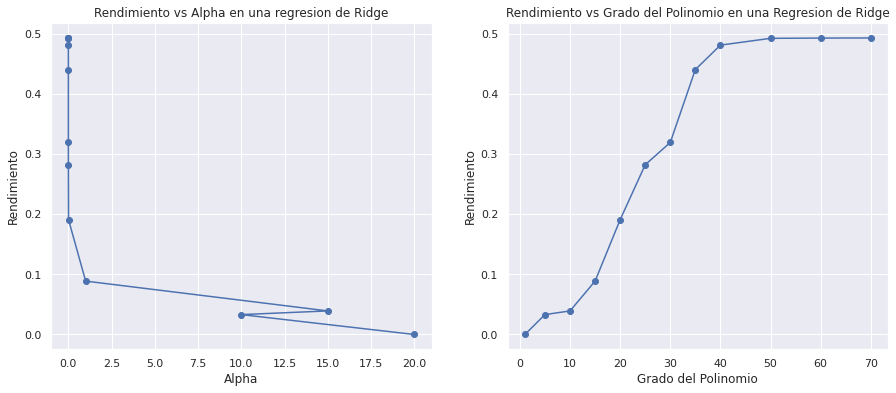

In [ ]:
#Sensibilidad de Alpha y grado de la Regresion Lineal Ridge

alpha_lista = [20, 10,15, 1, 1e-2,1e-3,1e-4,1e-8,1e-10, 1e-15, 1e-15,1e-15]
lista_grado = [1,5,10,15,20,25,30,35,40,50, 60 ,70]

accu_ridge = []
for x,j in zip(lista_grado, alpha_lista):
    accu_ridge.append(Ridge(x,j))


fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

ax1.plot(alpha_lista,accu_ridge, 'o-')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Rendimiento')
ax1.set_title('Rendimiento vs Alpha en una regresion de Ridge')

ax2.plot(lista_grado,accu_ridge,'o-')
ax2.set_title('Rendimiento vs Grado del Polinomio en una Regresion de Ridge')
ax2.set_xlabel('Grado del Polinomio')
ax2.set_ylabel('Rendimiento')

plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.710977715296565, tolerance: 0.016352105303328316
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.283880480784845, tolerance: 0.016352105303328316
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.2420918831757, tolerance: 0.016352105303328316
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.

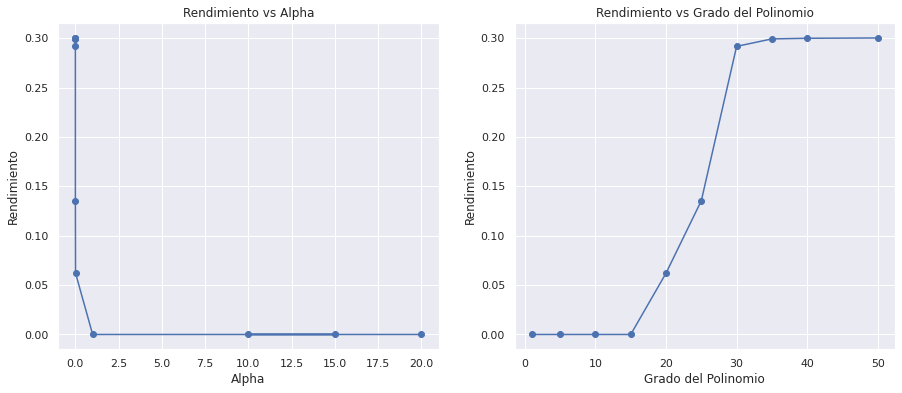

In [ ]:
#Sensibilidad de Alpha y grado de la Regresion Lineal Lasso

alpha_lista = [20, 10,15, 1, 1e-2,1e-3,1e-4,1e-8,1e-10, 1e-15]
lista_grado = [1,5,10,15,20,25,30,35,40,50]

accu_lasso = []
for x,j in zip(lista_grado, alpha_lista):
    accu_lasso.append(lasso(x,j))


fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

ax1.plot(alpha_lista,accu_lasso, 'o-')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Rendimiento')
ax1.set_title('Rendimiento vs Alpha')

ax2.plot(lista_grado,accu_lasso,'o-')
ax2.set_title('Rendimiento vs Grado del Polinomio')
ax2.set_xlabel('Grado del Polinomio')
ax2.set_ylabel('Rendimiento')

plt.show()

*¿Qué ocurre al aumentar el valor de alfa (penalización) en cada modelo?*

Desde la gráfica, se puede observar que existe una relación inversamente proporcional entre el parámetro Alpha y el rendimiento del modelo. A medida que el Alpha aumenta, el rendimiento del modelo disminuye, ya que el Alpha evita el overfiting de los modelos. El parámetro Alpha regula la complejidad del modelo, a menores Alpha, el modelo es mas complejo, por lo que, aprende de mejor manera los datos (no generaliza bien la tendencia central de los datos).

Por otro lado, también existe directa entre la precisión del modelo y su grado de polinomial, si aumentamos el grado del polinomio, mejor los datos serán modelados por el modelo, aumentando su precisión, pero su overfiting. 

In [ ]:
#Best parametros Ridge Regression
def best_parametro(modelo):
    from sklearn.model_selection import GridSearchCV
    
    parameters = {'alpha' :[20, 15,10, 1, 1e-2,1e-3,1e-4,1e-8,1e-10, 1e-15]}
    
    if modelo == 'Ridge':
       model = Ridge(normalize=True)
       polinomio = PolynomialFeatures(degree = 40)
       x = df['tiempo'].values.reshape(-1,1)
       data_poly = polinomio.fit_transform(x)

       Ridge_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

       Ridge_reg.fit(df['tiempo'].values.reshape(-1,1),df['magnitud'])
      
       return Ridge_reg.best_estimator_

    elif modelo == 'Lasso':

       model = Lasso(normalize=True)
       polinomio = PolynomialFeatures(degree = 30)
       x = df['tiempo'].values.reshape(-1,1)
       data_poly = polinomio.fit_transform(x)

       Lasso_reg= GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)
       
       #fit the grid search
       Lasso_reg.fit(df['tiempo'].values.reshape(-1,1),df['magnitud'])

       # best estimator
       return Lasso_reg.best_estimator_

In [ ]:
print('El mejor estimador para la regresion Ridge es: {}'.format(best_parametro('Ridge')))
print('\n')
print('El mejor estimador para la regresion Lasso es: {}'.format(best_parametro('Lasso')))
print('\n')

El mejor estimador para la regresion Ridge es: Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)


El mejor estimador para la regresion Lasso es: Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)




*¿Cuales son los optimos parametros de alpha para las dos regresiones?*

Para la regresión Ridge y Lasso, los parámetros óptimos para el Alpha son 0.001 y 1e-8 respectivamente. Se puede observar que los parámetros son bastante pequeños, lo que implica que se le da mas importancia al error cuadrado medio más que penalización, complejizando el modelo para que sea capaz de aprender y obtener tendencias no globales de los datos.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 57.378022303589745, tolerance: 0.016352105303328316
  positive)


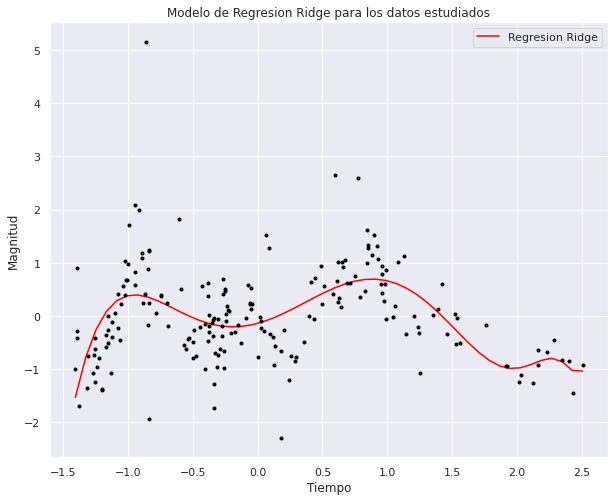

In [ ]:
#Grafico del modelo de Lasso

polinomio = PolynomialFeatures(degree = 30)

x = df['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

model = Lasso(alpha = 1e-8, normalize=True)

model.fit(data_poly, df['magnitud']) 

x_lin = np.linspace(min(df['tiempo']),max(df['tiempo'])).reshape(-1,1)

data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

plt.figure(figsize=(10,8))
plt.plot(x_lin,y_pred, color='red', label = 'Regresion Ridge')
plt.plot(df['tiempo'], df['magnitud'],'.', color='black')
plt.title('Modelo de Regresion Ridge para los datos estudiados')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.legend()
plt.show()

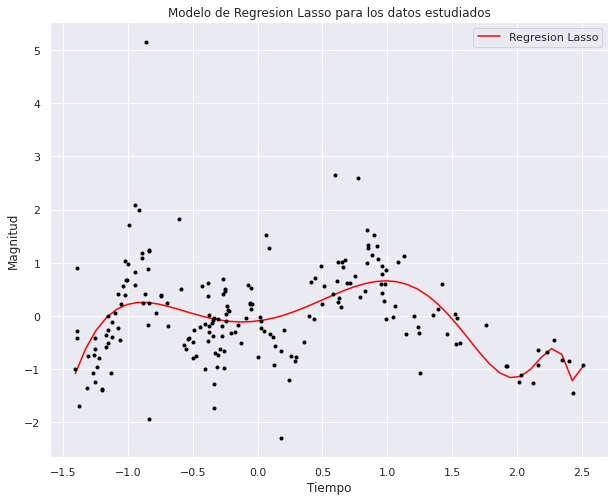

In [ ]:
#Grafico del modelo de Lasso

polinomio = PolynomialFeatures(degree = 40)

x = df['tiempo'].values.reshape(-1,1)
data_poly = polinomio.fit_transform(x) 

model = Ridge(alpha = 0.001, normalize=True)

model.fit(data_poly, df['magnitud']) 

x_lin = np.linspace(min(df['tiempo']),max(df['tiempo'])).reshape(-1,1)

data_poly_plot = polinomio.fit_transform(x_lin)
y_pred = model.predict(data_poly_plot)

plt.figure(figsize=(10,8))
plt.plot(x_lin,y_pred, color='red', label = 'Regresion Lasso')
plt.plot(df['tiempo'], df['magnitud'],'.', color='black')
plt.title('Modelo de Regresion Lasso para los datos estudiados')
plt.ylabel('Magnitud')
plt.xlabel('Tiempo')
plt.legend()
plt.show()

# Segunda Parte 2: **Clasificación de estrellas variables**


## **Exploracion y Visualizacion de los datos (EDA)** 

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ts2.csv to ts2.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['ts2.csv']))
df.head()

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,lpv,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,lpv,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,ecl,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,lpv,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,lpv,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Amplitude,5000.0,0.106905,0.147896,0.007000,0.021000,0.043500,0.143500,1.700500
AndersonDarling,5000.0,0.130491,0.202838,0.000000,0.000016,0.020842,0.185764,0.980413
Autocor_length,5000.0,4.545400,6.121163,1.000000,1.000000,2.000000,5.000000,70.000000
Beyond1Std,5000.0,0.317532,0.060427,0.070470,0.290000,0.318182,0.348214,0.536667
Gskew,5000.0,0.016345,0.126287,-1.763000,-0.004000,0.002500,0.017000,1.479000
LinearTrend,5000.0,0.000001,0.000684,-0.016436,-0.000015,-0.000002,0.000009,0.033689
MaxSlope,5000.0,2.175457,9.423721,0.006402,0.096856,0.342336,1.038683,335.151515
Mean,5000.0,14.988370,1.889971,11.666225,13.608853,14.514339,15.592765,21.099524
Meanvariance,5000.0,0.003703,0.005527,0.000259,0.000743,0.001596,0.005258,0.075959
MedianAbsDev,5000.0,0.039180,0.062624,0.002000,0.007000,0.014000,0.051500,1.025000


In [ ]:
df.groupby('Class').mean()

,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
Class,,,,,,,,,,,,,
NonVar,0.022866,0.135241,1.012195,0.288290,0.002970,0.000005,2.008790,15.789335,0.000729,0.007189,0.541336,0.002812,64.689062
acep,0.268750,0.000000,5.500000,0.468333,-0.228000,0.000017,6.505490,17.281444,0.009614,0.116500,0.291667,0.024215,1.012398
cep,0.183822,0.029574,1.252336,0.428634,-0.071565,-0.000025,1.717539,16.145929,0.007098,0.093280,0.221424,0.015067,2.337718
dpv,0.064000,0.064502,1.000000,0.347222,0.024000,0.000033,0.128342,17.024069,0.002041,0.027000,0.305556,0.004877,2.229941
dsct,0.410719,0.080104,1.000000,0.280097,0.138187,0.000004,23.869599,19.856215,0.010154,0.125688,0.519575,0.038122,0.451975
ecl,0.199064,0.007999,1.871901,0.224079,0.202963,0.000088,8.338255,18.026616,0.005505,0.048706,0.580100,0.022417,16.334861
lpv,0.070987,0.158056,5.560265,0.319494,0.002922,-0.000014,0.615084,14.104851,0.002769,0.026873,0.410810,0.007490,397.424340
rrlyr,0.261010,0.069247,1.084980,0.374208,-0.049857,0.000032,6.666273,17.965605,0.008142,0.108070,0.303451,0.020877,0.553407
t2cep,0.258114,0.000066,1.909091,0.365163,0.101136,0.000039,1.911687,15.566716,0.010219,0.122364,0.233639,0.024950,11.174373


In [ ]:
#Revision de valores nulos
df.isnull().sum()

Class               0
Amplitude           0
AndersonDarling     0
Autocor_length      0
Beyond1Std          0
Gskew               0
LinearTrend         0
MaxSlope            0
Mean                0
Meanvariance        0
MedianAbsDev        0
MedianBRP           0
PercentAmplitude    0
PeriodLS            0
dtype: int64

In [ ]:
#Distribucion de Balance de Clases 
df['Class'].value_counts()/len(df)*100

lpv       75.50
rrlyr     10.12
ecl        9.68
cep        2.14
NonVar     1.64
dsct       0.64
t2cep      0.22
acep       0.04
dpv        0.02
Name: Class, dtype: float64

La clase LPV es la que tienen mayor cantidad de datos en el dataaset, siendo un dataset desbalanceado.



In [ ]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
df['Class'] = number.fit_transform(df['Class'])
df.head()

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,Meanvariance,MedianAbsDev,MedianBRP,PercentAmplitude,PeriodLS
0,6,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.000995,0.0090,0.533333,0.004906,17.880565
1,6,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.008650,0.0975,0.240000,0.026910,0.997859
2,5,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.006736,0.0710,0.530000,0.027474,2.534404
3,6,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.013279,0.1515,0.250000,0.029652,117.161715
4,6,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.000410,0.0040,0.494681,0.001470,7.655264


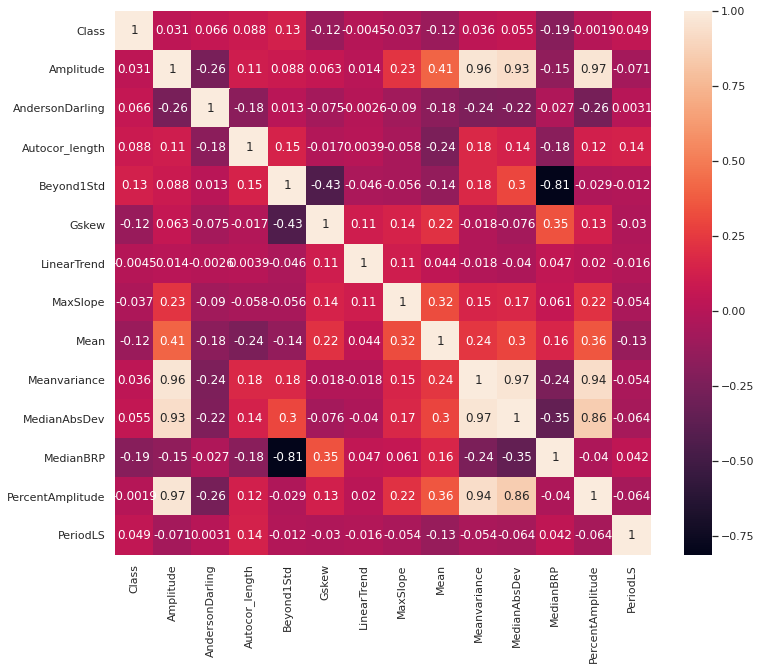

In [ ]:
plt.figure(figsize =(12,10))
sns.heatmap(df.corr(), annot = True)

De la grafica anterior, se puede observar que las variables Meanvariance, MedianAbsDev, PercentAmplitude, MedianBRP, Amplitude, Beyond1Std estan bastante correlacionadas entre si, por lo que, seria aconsejable hacer un analisis mas detallado de ellas.



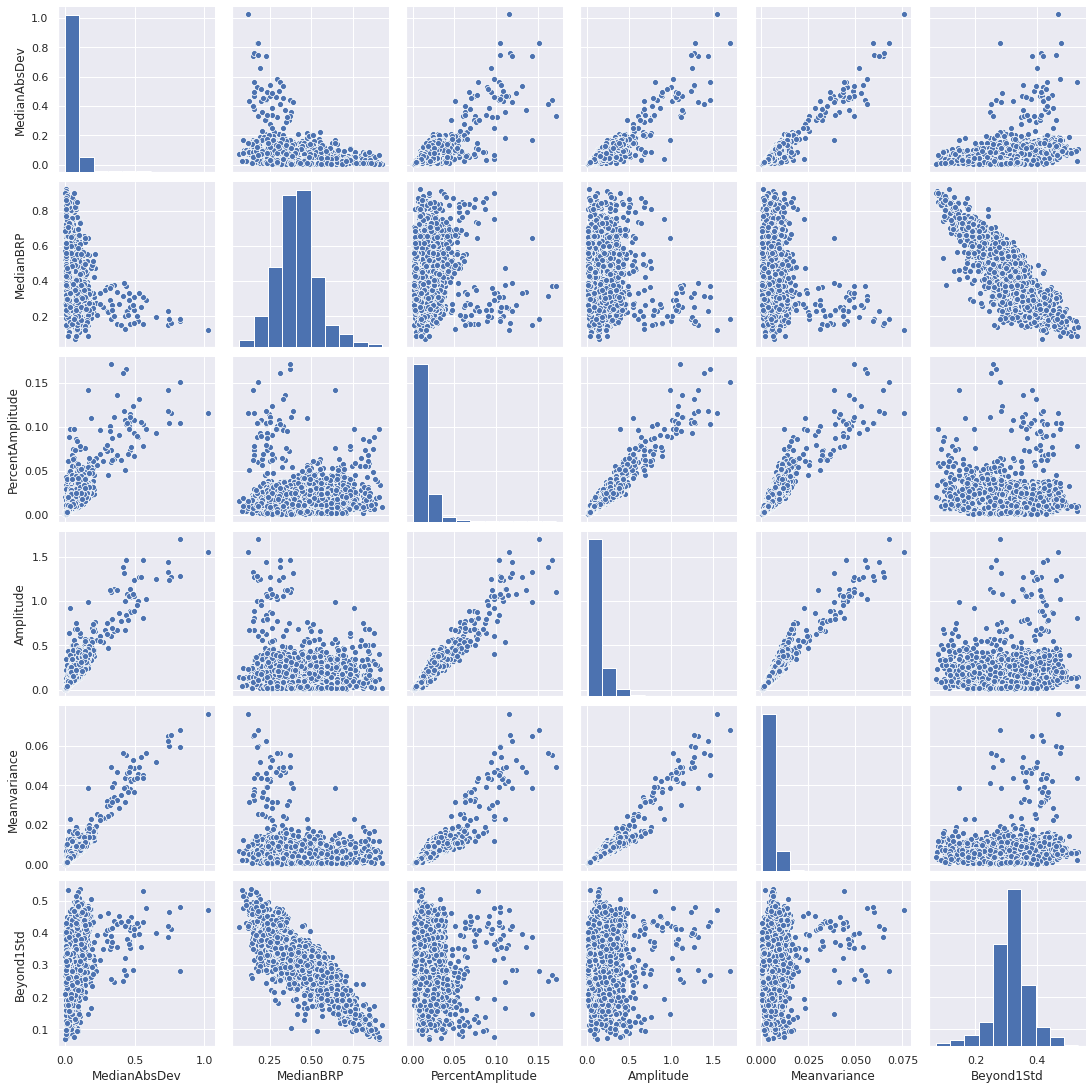

In [ ]:
sns.pairplot(df[['MedianAbsDev','MedianBRP','PercentAmplitude', 'Amplitude','Meanvariance', 'Beyond1Std']])

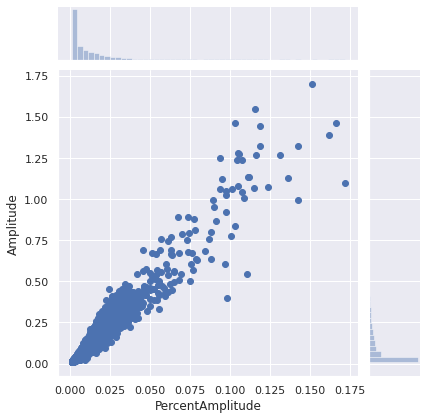

In [ ]:
sns.jointplot(x = 'PercentAmplitude', y = 'Amplitude', data = df)

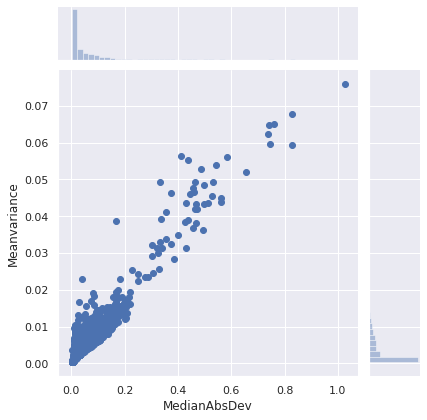

In [ ]:
sns.jointplot(x = 'MedianAbsDev', y = 'Meanvariance', data = df)

Desde este grafico, se puede observar que las variables Meanvariance y PercentAmplitude estan bastante correlaciones y tienen un comportamiento muy similar a la variables Amplitud y MeanAbsDev. Para simiplicidad del modelo, he decidido no incluirlas en la modelacion.


In [ ]:
columnas_lista = df.columns
columnas_nuevas = []
for x in columnas_lista:
    if x not in ('PercentAmplitude','Meanvariance'):
        columnas_nuevas.append(x)
df = df[columnas_nuevas]
df.head()

,Class,Amplitude,AndersonDarling,Autocor_length,Beyond1Std,Gskew,LinearTrend,MaxSlope,Mean,MedianAbsDev,MedianBRP,PeriodLS
0,lpv,0.02700,0.000000,3,0.270000,0.019,-0.000007,0.130305,14.270917,0.0090,0.533333,17.880565
1,lpv,0.21400,0.000000,18,0.346667,0.126,0.000001,0.010560,13.696013,0.0975,0.240000,0.997859
2,ecl,0.27050,0.000000,1,0.223333,0.232,-0.000010,0.319591,19.368090,0.0710,0.530000,2.534404
3,lpv,0.34250,0.000000,13,0.396667,-0.017,-0.000090,0.664452,14.216857,0.1515,0.250000,117.161715
4,lpv,0.01075,0.097155,1,0.313830,-0.002,-0.000002,0.105675,13.609633,0.0040,0.494681,7.655264


## **Construccion de Modelos y Resultados**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = df.iloc[:,1:] #variables dependientes
Y = df.iloc[:,0]  #variables independientes

In [ ]:
def modelos(x, y, modelo):
  
  scaler = MinMaxScaler()

  #SVC
  if modelo == 'SVC':

     X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                   random_state = 0)
     X_train_scaled = scaler.fit_transform(X_train)
     X_test_scaled = scaler.transform(X_test)
     
     svm = SVC(C=10).fit(X_train_scaled, y_train)
     svm_predicted_mc = svm.predict(X_test_scaled)
     confusion_mc = confusion_matrix(y_test, svm_predicted_mc)
    
    
     print('La accuracy del modelo en el Dataset de Train es : {:.2f}'
     .format(svm.score(X_train_scaled, y_train)))

     print('La accuracy del modelo en el Dataset de Test es : {:.2f}'
     .format(svm.score(X_test_scaled, y_test)))
     print('El F1_score del modelo en el Dataset de Test es : {:.2f}'
     .format(f1_score(y_test,svm_predicted_mc,average = 'macro')))
     print('\n')
     
     fig, ax = plt.subplots(figsize=(10, 6))
     plot_confusion_matrix(svm, X_test_scaled, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
     return plt.show()

  elif modelo == 'Arbol de Decision':
     
     X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 3)
     X_train_scaled = scaler.fit_transform(X_train)  
     X_test_scaled = scaler.transform(X_test)
     
     arbol = DecisionTreeClassifier(max_depth = 3).fit(X_train_scaled, y_train)

     tree_predicted_mc = arbol.predict(X_test_scaled)
     
     
     print('La accuracy del modelo en el Dataset de Train es : {:.2f}'
     .format(arbol.score(X_train_scaled, y_train)))

     print('La accuracy del modelo en el Dataset de Test es : {:.2f}'
     .format(arbol.score(X_test_scaled, y_test)))
     print('El F1_score del modelo en el Dataset de Test es : {:.2f}'
     .format(f1_score(y_test,tree_predicted_mc,average = 'macro')))
     print('\n')

     fig, ax = plt.subplots(figsize=(10, 6))
     plot_confusion_matrix(arbol, X_test_scaled, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
     return plt.show()

  elif modelo == 'Random Forest':

     X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
     X_train_scaled = scaler.fit_transform(X_train)
     X_test_scaled = scaler.transform(X_test)

     random = RandomForestClassifier(max_features = 5, random_state = 0)
     random.fit(X_train_scaled, y_train)

     
     print('La accuracy del modelo en el Dataset de Train es : {:.2f}'
     .format(random.score(X_train_scaled, y_train)))

     random_predicted_mc = random.predict(X_test_scaled)
     print('La accuracy del modelo en el Dataset de Test es : {:.2f}'
     .format(random.score(X_test_scaled, y_test)))
     print('El F1_score del modelo en el Dataset de Test es : {:.2f}'
     .format(f1_score(y_test,random_predicted_mc,average = 'macro')))
     print('\n')
     
     fig, ax = plt.subplots(figsize=(10, 6))
     plot_confusion_matrix(random, X_test_scaled, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
     return plt.show()

Modelo: SVC


La accuracy del modelo en el Dataset de Train es : 0.96
La accuracy del modelo en el Dataset de Test es : 0.95
El F1_score del modelo en el Dataset de Test es : 0.57




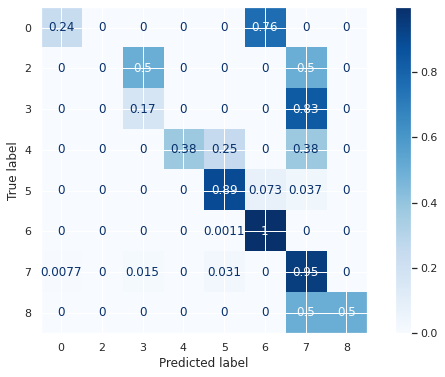

None
Modelo: Arbol de Decision


La accuracy del modelo en el Dataset de Train es : 0.93
La accuracy del modelo en el Dataset de Test es : 0.92
El F1_score del modelo en el Dataset de Test es : 0.40




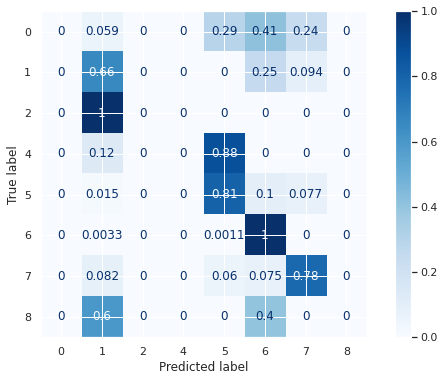

None
Modelo: Random Forest


La accuracy del modelo en el Dataset de Train es : 1.00
La accuracy del modelo en el Dataset de Test es : 0.98
El F1_score del modelo en el Dataset de Test es : 0.75




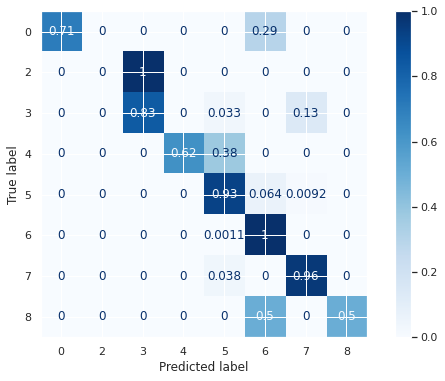

None


In [ ]:
modelos_lista = ['SVC', 'Arbol de Decision', 'Random Forest']

for i in modelos_lista:
   print('Modelo: {}'.format(i))
   print('\n')
   print(modelos(X, Y, i))

De los resultados de los tres modelos presentandos, se puede desprender que el modelo Random Forest, es el que mejor precide la categoria de las estrellas, con una accuracy y F1_Score del 0,98 y 0,75 respectivamente. Este modelo es muy potente, ya que es una version mejorada del modelo de arbol de decision tradicional, ya que a traves de multiples arboles de decisiones, con un muestro del dataset y caracteristicas, permite generar un modelo bastante solido. 

**Hiperparametros para Arbol de Decision**


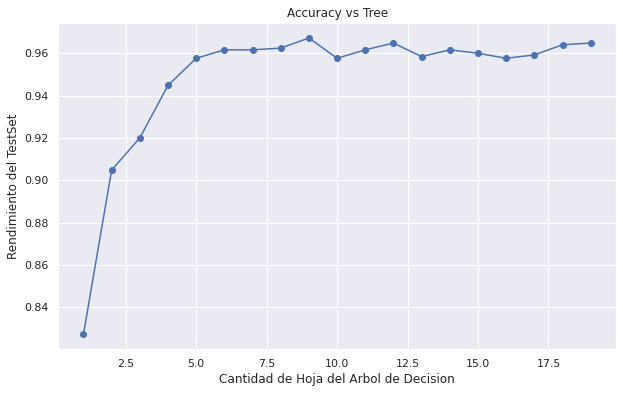

In [ ]:
def maximizar_ramass():
    #Funcion para obtener la profundida que maximize la accuraccy del modelo.
    scaler = MinMaxScaler()
    score_arbol = []
    for x in range(1,20):
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 3)
        
        X_train_scaled = scaler.fit_transform(X_train) 
        X_test_scaled = scaler.transform(X_test)
        clf = DecisionTreeClassifier(max_depth = x).fit(X_train_scaled, y_train)
        score_arbol.append(clf.score(X_test_scaled, y_test))
    
    plt.figure(figsize=(10,6))
    plt.plot(range(1,20),score_arbol, 'o-')
    plt.title('Accuracy vs Tree')
    plt.xlabel('Cantidad de Hoja del Arbol de Decision')
    plt.ylabel('Rendimiento del TestSet')
  
maximizar_ramass()

La accuracy del modelo en el Dataset de Test es : 0.96
El F1_score del modelo en el Dataset de Test es : 0.70




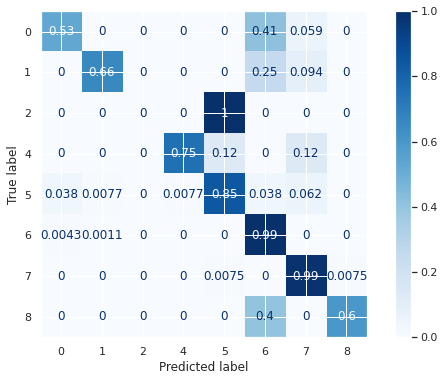

In [ ]:
#Arbol de decision, maximizando el parametro max_depth 

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 3)
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)
     
arbol = DecisionTreeClassifier(max_depth = 5).fit(X_train_scaled, y_train)

tree_predicted_mc = arbol.predict(X_test_scaled)
     
print('La accuracy del modelo en el Dataset de Test es : {:.2f}'
.format(arbol.score(X_test_scaled, y_test)))
print('El F1_score del modelo en el Dataset de Test es : {:.2f}'
.format(f1_score(y_test,tree_predicted_mc,average = 'macro')))
print('\n')

fig, ax = plt.subplots(figsize=(10, 6))
plot_confusion_matrix(arbol, X_test_scaled, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.show()

Luego de ejectuar el modelo con el max_depth optimizado, se puede observar que la accuracy del modelo y el F1_score se han incrementando, mejorando la perfomance del modelo. Por otro lado, el modelo pfesentaba bastantes problemas con la clase 1 en su inicio, ya que no estaba prediciendola correctamente. Despues de la modificacion, se puede observar que no hay grande problemas con la "Predicted Label" en 1, ya que esta prediciendola de mejor manera.



**CLUSTERING: k-MEANS**

In [ ]:
from sklearn.cluster import KMeans

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters = 9, random_state = 0)
kmeans.fit(X_scaled)
print('Distancia del centroide del clasificador {}'.format(kmeans.inertia_))

Distancia del centroide del clasificador 208.21160267102275


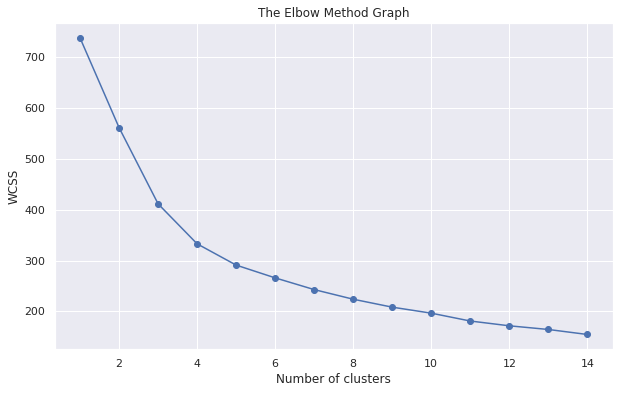

In [ ]:
#Optimizacion del n(numero de cluster)
wcss=[]

for i in range(1,15): 
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,15),wcss,'o-' )
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters = 6, random_state = 0)
kmeans.fit(X_scaled)
print('Distancia del centroide del clasificador {}'.format(kmeans.inertia_))

Distancia del centroide del clasificador 265.8151567891808


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5000 samples in 0.011s...
[t-SNE] Computed neighbors for 5000 samples in 0.169s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5000
[t-SNE] Computed conditional probabilities for sample 2000 / 5000
[t-SNE] Computed conditional probabilities for sample 3000 / 5000
[t-SNE] Computed conditional probabilities for sample 4000 / 5000
[t-SNE] Computed conditional probabilities for sample 5000 / 5000
[t-SNE] Mean sigma: 0.560259
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.969189


No handles with labels found to put in legend.


[t-SNE] KL divergence after 300 iterations: 1.432881


Text(0.5, 1.0, 'Agrupacion de los Clusters por factorizacion de sus componenetes')

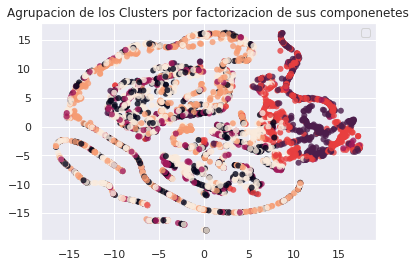

In [ ]:
#Descomposicion de las variables (OPCIONAL)

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(2)

tsne = TSNE(n_components = 2, verbose = 1, perplexity= 30 , n_iter = 300)

project = tsne.fit_transform(X)

plt.scatter(project[:,0],project[:,1], c=kmeans.labels_, edgecolor ='none',alpha = 0.8)
plt.legend()
plt.title('Agrupacion de los Clusters por factorizacion de sus componenetes')